# Week 1: Introduction to OpenCV

In [2]:
# Requirements for this tutorial
! pip install opencv-python
! pip install numpy

     --------------------------------------- 38.2/38.2 MB 72.5 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# If you prefer, you can convert this notebook to a Python script by uncommenting the following command
# ! pip install nbconvert
# ! jupyter nbconvert --to script tutorial-week1.ipynb

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
    
dataDir = './data'

1. Images – read, write and display; ROIs

In [ ]:
# Opening an image
img = cv2.imread(os.path.join(dataDir, 'ml.jpg'))

# Showing the image
cv2.imshow("ml.jpg", img)

# Waiting for user to press a key to close the image
cv2.waitKey(0)

# Close the window after user pressed a key
cv2.destroyWindow("ml.jpg")

In [ ]:
# Check image size
h, w, c = img.shape
print(f'height: {h}')
print(f'width: {w}')
print(f'channels: {c}')

In [ ]:
# Saving image in bmp format
cv2.imwrite(os.path.join(dataDir, 'ml_new.bmp'), img)

In [ ]:
# Continue exercises 1 c) and d)

draw = False

# Mouse Callback on click
def mouseCallback(event, x, y, flags, params):
    global draw     # use global variable draw

    if event == cv2.EVENT_LBUTTONDOWN:
        draw = True
    if event == cv2.EVENT_LBUTTONUP:
        draw = False
    if event == cv2.EVENT_MOUSEMOVE:
        # In OpenCV, the color channels are in Blue Green Red order
        colorsB = img[y, x, 0]
        colorsG = img[y, x, 1]
        colorsR = img[y, x, 2]
        print(f'x: {x}, y: {y}')
        print(f'BGR: ({colorsB}, {colorsG}, {colorsR})')
        # cv2.putText(img=img, text=f'BGR: ({colorsB}, {colorsG}, {colorsR})', org=(300, 300), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0, 0, 0), thickness=2, lineType=cv2.LINE_AA)

        if draw:
            # modify rgb values
            newColor = (255 - img[y, x, 0], 255 - img[y, x, 1], 255 - img[y, x, 2])
            img[y, x] = newColor
        
            print(f'Changed pixel at x: {x}, y: {y} to {newColor}')
            cv2.imshow("ex1c", img)
    
# Create named window and set mouse callback
cv2.namedWindow("ex1c")
cv2.setMouseCallback("ex1c", mouseCallback)

cv2.imshow("ex1c", img)
cv2.waitKey(0)
cv2.destroyWindow("ex1c")

In [ ]:
# Exercise 1d)
        

# Select ROI
r = cv2.selectROI(windowName = "ex1d", img=img)
# Crop image
imCrop = img[int(r[1]):int(r[1]+r[3]), 
                      int(r[0]):int(r[0]+r[2])]

# Save cropped image to disk
cv2.imwrite(os.path.join(dataDir, 'img_cropped.png'), imCrop)

# Display cropped image
cv2.imshow("ex1d", imCrop)
cv2.waitKey(0)

cv2.destroyWindow("ex1d")


2. Images – representation, grayscale and color, color spaces

In [ ]:
# Create a white image
m = np.ones((100,200,1), np.uint8)

# Change the intensity to 100
m = m * 100

# Display the image
cv2.imshow('Grayscale image', m)
cv2.waitKey(0)
cv2.destroyWindow('Grayscale image')

In [ ]:
# Draw a line with thickness of 5 px
cv2.line(m, (0,0), (200,100), 255, 5)
cv2.line(m, (200, 0), (0, 100), 255, 5)
cv2.imshow('Grayscale image with diagonals', m)
cv2.waitKey(0)
cv2.destroyWindow('Grayscale image with diagonals')

In [4]:
# Continue exercises 2 b), c), d), e) and f)
# 2b)
# Create a white image
yellow_img = np.ones((100, 200, 3), np.uint8)

# Change the color to yellow
yellow_img[:, :] = (0, 255, 255)

cv2.line(yellow_img, (0, 0), (200, 100), (0, 0, 255), 5)
cv2.line(yellow_img, (200, 0), (0, 100), (255, 0, 0), 5)

# Display the image
cv2.imshow("Yellow image", yellow_img)
cv2.waitKey(0)
cv2.destroyWindow("Yellow image")

In [5]:
# 2 c)
colored_img = cv2.imread(os.path.join(dataDir, 'ml.jpg'))
cv2.imshow("Colored image", colored_img)

# Convert to grayscale
grayscale_img = cv2.cvtColor(colored_img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Grayscale image", grayscale_img)

cv2.waitKey(0)
cv2.destroyWindow("Colored image")
cv2.destroyWindow("Grayscale image")

cv2.imwrite(os.path.join(dataDir, 'ml_grayscale.jpg'), grayscale_img)

True

In [7]:
# 2 d)
colored_img = cv2.imread(os.path.join(dataDir, 'ml.jpg'), cv2.IMREAD_GRAYSCALE)

# Start by getting the dimensions of the image
h, w = colored_img.shape

# Total number of noisy points = 10% of the total number of pixels
num_noisy = h * w * 0.1

# Randomly select the number of white points
num_white = np.random.randint(0, num_noisy)
num_black = int(num_noisy - num_white)

# Create a list of coordinates for the white points
white_coords = [(np.random.randint(0, h), np.random.randint(0, w)) for i in range(num_white)]
black_coords = [(np.random.randint(0, h), np.random.randint(0, w)) for i in range(num_black)]

# Since it's a grayscale image, each pixel is represented by a single value
# Set the white points to 255
for coord in white_coords:
    colored_img[coord] = 255
# Set the black points to 0
for coord in black_coords:
    colored_img[coord] = 0

cv2.imshow("Noisy image", colored_img)

# Store the noisy image
cv2.imwrite(os.path.join(dataDir, 'ml_noisy.jpg'), colored_img)

cv2.waitKey(0)
cv2.destroyWindow("Noisy image")




In [10]:
# 2 e)
colored_img = cv2.imread(os.path.join(dataDir, 'rgb_rectangles.png'))

# Split the image into its color channels
b, g, r = cv2.split(colored_img)

# Show each channel
cv2.imshow("Blue channel", b)
cv2.imshow("Green channel", g)
cv2.imshow("Red channel", r)

# Destroy the windows
cv2.waitKey(0)
cv2.destroyWindow("Blue channel")
cv2.destroyWindow("Green channel")
cv2.destroyWindow("Red channel")

# Add a constant value to the green channel
g = g + 100

# Merge the channels
colored_img = cv2.merge((b, g, r))

# Show the image
cv2.imshow("Modified image", colored_img)
cv2.waitKey(0)
cv2.destroyWindow("Modified image")



In [12]:
# 2 f)
colored_img = cv2.imread(os.path.join(dataDir, 'rgb_rectangles.png'))

# Convert it to HSV
hsv_img = cv2.cvtColor(colored_img, cv2.COLOR_BGR2HSV)
# Split the image into its channels (HSV)
h, s, v = cv2.split(hsv_img)

# Show each channel
cv2.imshow("Hue channel", h)
cv2.imshow("Saturation channel", s)
cv2.imshow("Value channel", v)

# Destroy the windows
cv2.waitKey(0)
cv2.destroyWindow("Hue channel")
cv2.destroyWindow("Saturation channel")
cv2.destroyWindow("Value channel")

# Add a constant value to the saturation channel
s = s + 50
# Merge the channels back together
hsv_img = cv2.merge((h, s, v))

# Show the resulting image
cv2.imshow("Modified image", hsv_img)
cv2.waitKey(0)
cv2.destroyWindow("Modified image")


3. Video – acquisition and simple processing

In [2]:
# Define a VideoCapture Object
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

frame_nr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow('webcam', frame)

    # Wait for user to press s to save frame
    if cv2.waitKey(1) == ord('s'):
        frame_name = 'frame' + str(frame_nr) + '.png'
        cv2.imwrite(os.path.join(dataDir, frame_name), frame)
        cv2.imshow("Saved frame: " + frame_name, frame)
        cv2.waitKey(0)
        cv2.destroyWindow("Saved frame: " + frame_name)

    # Wait for user to press q to quit
    if cv2.waitKey(1) == ord('q'):
        break

    frame_nr += 1

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

In [3]:
# Continue exercises 3 b), c) and d)
# 3 b)
# Define a VideoCapture Object
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

frame_nr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow('webcam', frame)

    # Convert the resulting frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Show the grayscale frame
    cv2.imshow('grayscale webcam', gray_frame)

    # Wait for user to press q to quit
    if cv2.waitKey(1) == ord('q'):
        break

    frame_nr += 1

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

In [5]:
# 3 c)
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

frame_nr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow('webcam', frame)

    # Convert the resulting frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Convert the grayscale frame to binary
    ret, binary_frame = cv2.threshold(gray_frame, 128, 255, cv2.THRESH_BINARY)
    if not ret:
        print("Can't threshold frame. Exiting ...")
        break
    
    # Show the binary frame
    cv2.imshow('binary webcam', binary_frame)

    # Wait for user to press q to quit
    if cv2.waitKey(1) == ord('q'):
        break

    frame_nr += 1

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()


In [5]:
# 3 d)
# Define a VideoCapture Object
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

frame_nr = 0
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    # Display the resulting frame
    cv2.imshow('webcam', frame)

    # Convert from BGR to HSV
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Threshold the HSV image to only get Blue colors
    # Since each HSV channel is represented by a 8-bit integer, the range of values is [0, 180] (value is / 2)
    # So the Hue range is actually [210, 260]
    lower_blue = np.array([105, 50, 50])
    upper_blue = np.array([130, 255, 255])
    mask = cv2.inRange(hsv_frame, lower_blue, upper_blue)

    # Bitwise-AND mask and original image
    # Since the mask is binary, we cannot use the mask directly in the bitwise_and operation
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Show the resulting frame
    cv2.imshow('webcam with blue mask', res)

    # Wait for user to press q to quit
    if cv2.waitKey(1) == ord('q'):
        break

    frame_nr += 1

# When everything is done, release the capture
cap.release()
cv2.destroyAllWindows()

4. Image enhancement - filtering

In [8]:
# 4 a)
# Read the noisy image
noisy_img = cv2.imread(os.path.join(dataDir, 'butterfly_noisy.jpg'))

MAX_KERNEL_LENGTH = 9

# Apply a mean filter
for i in range(1, MAX_KERNEL_LENGTH, 2):
    mean_filtered_img = cv2.blur(noisy_img, (i, i))

    # Show the resulting image
    cv2.imshow("Mean filtered image " + str(i), mean_filtered_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# 4 b)

MAX_KERNEL_LENGTH = 9

# For different kernel lengths
for i in range(1, MAX_KERNEL_LENGTH, 2):
    # Apply a gaussian filter
    gaussian_filtered_img = cv2.GaussianBlur(noisy_img, (5, 5), 0)

    # Show the resulting image
    cv2.imshow("Gaussian filtered image " + str(i), gaussian_filtered_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# 4 c)

MAX_KERNEL_LENGTH = 9

# For different kernel lengths
for i in range(1, MAX_KERNEL_LENGTH, 2):
    # Apply a median filter
    median_filtered_img = cv2.medianBlur(noisy_img, i)

    # Show the resulting image
    cv2.imshow("Median filtered image " + str(i), median_filtered_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# 4 d)
MAX_KERNEL_LENGTH = 9

# For different kernel lengths
for i in range(1, MAX_KERNEL_LENGTH, 2):
    # Apply a bilateral filter
    bilateral_filtered_img = cv2.bilateralFilter(noisy_img, i, i*2, i/2)

    # Show the resulting image
    cv2.imshow("Bilateral filtered image " + str(i), bilateral_filtered_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# 4 e)
import os
from matplotlib import pyplot as plt
from scipy import ndimage

# Read image
img = cv2.imread(os.path.join(dataDir,'butterfly_noisy.jpg')) 
# Convert to grayscale if needed
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Smooth using OpenCVGaussianBlur()
gaussianBlurred = cv2.GaussianBlur(img, (3 ,3 ), 0 )
# Smooth using convolution operation coded below
kernel_3x3 = (1 /16)* np.array([[1 , 2 , 1 ],[2 , 4 , 2 ],[1 , 2 , 1 ]])
print(kernel_3x3)
myConvolutionResult = ndimage.convolve(img, kernel_3x3)
# Show res ults
cv2.imshow("Original" , img)
cv2.imshow("OpenCV Gaussian Blur" , gaussianBlurred)
cv2.imshow("My 3x3 convolution w/Gaussian mask" , myConvolutionResult)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


5. Image enhancement - Histogram equalization

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

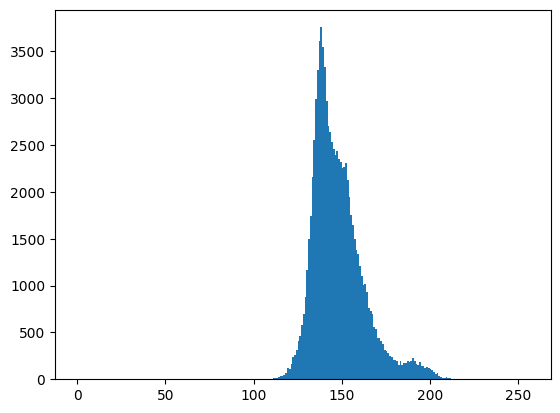

In [14]:
# 5 a)
# Take a low contrast grayscale image and plot its histogram
img = cv2.imread(os.path.join(dataDir, 'images/lowContrast_01.jpg'))

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plot the histogram
plt.hist(gray_img.ravel(), 256, [0, 256])

(array([ 142.,  342.,  394.,  255.,  311.,  405.,  460.,    0.,  575.,
           0.,  700.,    0.,  873.,    0.,    0.,    0., 1166.,    0.,
           0.,    0., 1500.,    0.,    0.,    0.,    0., 1744.,    0.,
           0.,    0.,    0.,    0., 2158.,    0.,    0.,    0.,    0.,
           0.,    0., 2550.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 2995.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 3298.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 3614.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 3756.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 3543.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 3329.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0., 2969.,    0.,    0.,    0.,
           0.,    0.,    0., 2700.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 2634.,    0.,    0.,    0.,    0.,    0.,    0.,
      

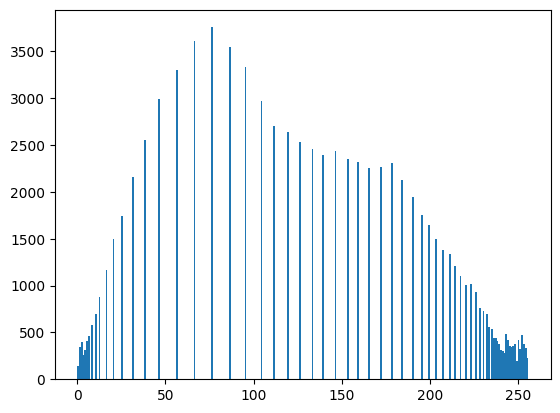

In [21]:
# 5 b)
# Enhance the image contranst using
#  b1) Histogram equalization
#  b2) CLAHE (Contrast Limited Adaptive Histogram Equalization)

# Histogram equalization
equalized_img = cv2.equalizeHist(gray_img)

# Plot the histogram
plt.hist(equalized_img.ravel(), 256, [0, 256])

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 5.000e+00,
        8.000e+00, 2.000e+00, 7.000e+00, 5.000e+00, 8.000e+00, 1.100e+01,
        1.700e+01, 1.300e+01, 2.000e+01, 1.900e+01, 1.500e+01, 3.000e+01,
        1.600e+01, 2.900e+01, 3.900e+01, 3.400e+01, 3.500e+01, 5.600e+01,
        5.200e+01, 5.200e+01, 6.600e+01, 5.200e+01, 6.700e+01, 9.100e+01,
        8.200e+01, 9.100e+01, 1.080e+0

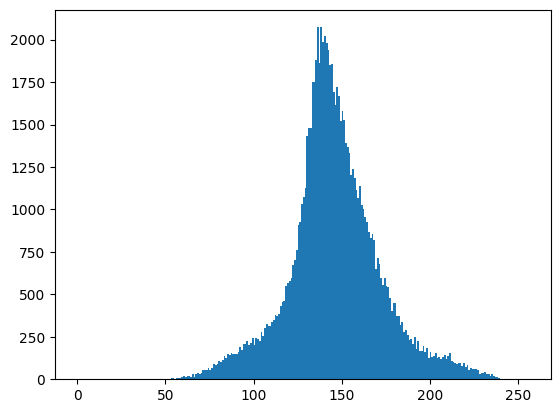

In [22]:
# b2) CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray_img)

# Plot the histogram
plt.hist(clahe_img.ravel(), 256, [0, 256])

(array([ 973., 1734.,  847.,  680.,  856.,  880.,  950., 1067., 1088.,
        1194., 1283., 1337., 1326., 1463., 1453., 1543., 1583., 1504.,
        1457., 1374., 1253., 1219., 1247., 1135.,  991.,  930.,  857.,
         826.,  749.,  706.,  691.,  642.,  601.,  568.,  486.,  507.,
         443.,  448.,  429.,  417.,  415.,  362.,  386.,  346.,  326.,
         315.,  331.,  333.,  346.,  333.,  350.,  359.,  344.,  395.,
         345.,  437.,  428.,  435.,  412.,  445.,  397.,  390.,  459.,
         453.,  492.,  529.,  471.,  531.,  471.,  491.,  412.,  471.,
         496.,  491.,  587.,  509.,  582.,  574.,  567.,  632.,  683.,
         742.,  774.,  812.,  894.,  820.,  857.,  875.,  863.,  804.,
         797.,  844.,  810.,  854.,  888.,  901.,  923.,  955.,  948.,
        1006., 1004.,  972., 1071., 1099., 1067.,  997.,  978.,  971.,
         895.,  931.,  855.,  905.,  869.,  895.,  882.,  875.,  913.,
         882.,  855.,  835.,  804.,  777.,  730.,  741.,  745.,  755.,
      

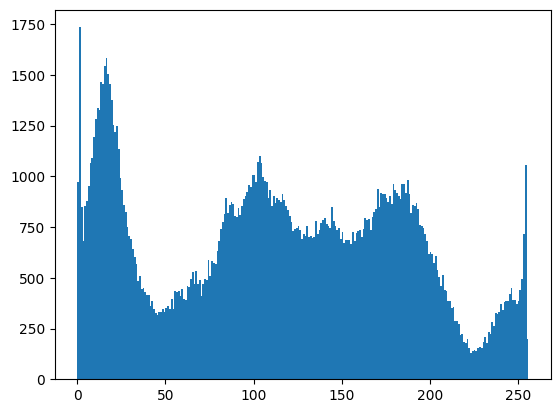

In [24]:
# 5 c) Repeat the previous operations on a color image

# Read colored image, convert to grayscale and plot the histogram
img = cv2.imread(os.path.join(dataDir, 'images/butterfly.jpg'))

# Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Plot the histogram
plt.hist(gray_img.ravel(), 256, [0, 256])

(array([ 973.,    0.,    0., 1734.,  847.,  680.,  856.,  880.,    0.,
         950., 1067.,    0., 1088.,    0., 1194., 1283.,    0., 1337.,
           0., 1326.,    0., 1463.,    0.,    0., 1453.,    0., 1543.,
           0., 1583.,    0., 1504.,    0.,    0., 1457.,    0., 1374.,
        1253.,    0., 1219.,    0., 1247.,    0., 1135.,  991.,  930.,
           0.,  857.,  826.,  749.,  706.,  691.,  642.,  601., 1054.,
         507.,  891.,  429.,  832.,  748.,  672.,  646.,  679.,  683.,
         703.,  740.,  437.,  863.,  412.,  842.,  849.,  453., 1021.,
         471.,  531.,  962.,  412.,  967.,  491.,  587.,  509., 1156.,
         567.,  632.,  683.,  742.,  774.,    0.,  812.,  894.,  820.,
         857.,    0.,  875.,  863.,  804.,  797.,  844.,    0.,  810.,
         854.,  888.,  901.,    0.,  923.,  955.,    0.,  948., 1006.,
           0., 1004.,  972., 1071.,    0., 1099.,    0., 1067.,  997.,
           0.,  978.,  971.,  895.,    0.,  931.,  855.,  905.,  869.,
      

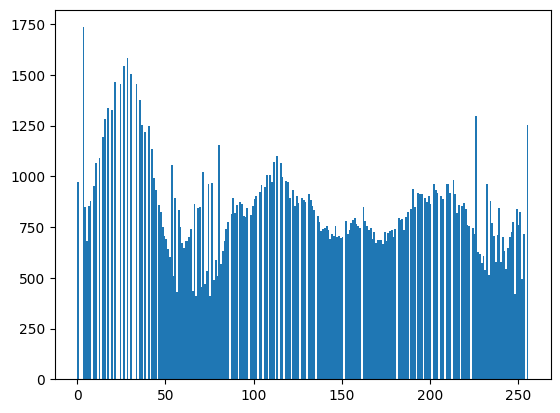

In [25]:
# Enhance the image contranst using
#  b1) Histogram equalization
#  b2) CLAHE (Contrast Limited Adaptive Histogram Equalization)

# Histogram equalization
equalized_img = cv2.equalizeHist(gray_img)

# Plot the histogram
plt.hist(equalized_img.ravel(), 256, [0, 256])

In [ ]:
# b2) CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gray_img)

# Plot the histogram
plt.hist(clahe_img.ravel(), 256, [0, 256])

6. Edge detection - Sobel filter

In [21]:
# 6 a) Calculate the first derivatives of the image in the x and y direction, using the Sobel function

# Load the image

"""
" @param kernelSize The size of the kernel to use for the Sobel filter
"""
def sobelFilter(imageSrc, kernelSize = 3, useGaussianBlur = False, gaussianBlurKernelSize = 3):
    img = cv2.imread(imageSrc)
    # Check if image was loaded correctly
    if img is None:
        print("error opening image" + imageSrc)
    else:
        # Can apply a gaussian blur to reduce noise
        if useGaussianBlur:
            img = cv2.GaussianBlur(img, (gaussianBlurKernelSize, gaussianBlurKernelSize), 0)

        # Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Define variables for the Sobel function
        ddepth = cv2.CV_16S
        scale = 1
        delta = 0

        # Calculate the first derivate in the x direction
        grad_x = cv2.Sobel(gray_img, ddepth, 1, 0, ksize= kernelSize, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

        # Calculate the first derivate in the y direction
        grad_y = cv2.Sobel(gray_img, ddepth, 0, 1, ksize= kernelSize, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
        # Could also try the cv2.Scharr function to approximate the derivatives

        # print("grad.x.shape = " + str(grad_x.shape))
        # print("grad.y.shape = " + str(grad_y.shape))
        print("grad_x" + str(grad_x))
        print("grad_y" + str(grad_y))

        return grad_x, grad_y


imageSrc = os.path.join(dataDir, 'images/FEUP_01.jpg')

# Call the method and get the gradients for each axis
grad_x, grad_y = sobelFilter(imageSrc, 3)

grad_x[[  0   2  -2 ...  50  56   0]
 [  0   2   0 ...  55  66   0]
 [  0   1   2 ...  59  73   0]
 ...
 [  0 -25  -6 ...   1   1   0]
 [  0 -10 -11 ...  -1   0   0]
 [  0   0 -14 ...  -4   0   0]]
grad_y[[ 0  0  0 ...  0  0  0]
 [ 4  4  6 ...  3 18 28]
 [ 2  1  0 ... 13  9  6]
 ...
 [22 27 30 ... -1 -1 -2]
 [18 28 35 ...  1 -2 -2]
 [ 0  0  0 ...  0  0  0]]


In [22]:
# 6b) Calculate the approximate value of the gradient by combining the directional directives

def combineSobelGradients(grad_x, grad_y, weight1 = 0.5, weight2 = 0.5):
    # Calculate the gradient magnitude in the x and y direction
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)

    # Combine the directional derivatives
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    # print the combined gradient
    print("grad.shape" + str(grad.shape))
    print("grad" + str(grad))
    return grad

# Call the method to combine the gradients
combinedGrad = combineSobelGradients(grad_x, grad_y, 0.5, 0.5)

grad.shape(787, 1181)
grad[[ 0  1  1 ... 25 28  0]
 [ 2  3  3 ... 29 42 14]
 [ 1  1  1 ... 36 41  3]
 ...
 [11 26 18 ...  1  1  1]
 [ 9 19 23 ...  1  1  1]
 [ 0  0  7 ...  2  0  0]]


In [23]:
# 6c) Show the gradient image

cv2.imshow("Sobel derivatives image", combinedGrad)

# close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
# Show the result of thresholding the gradient image; use a trackbar to select the threshold value

MAX_VALUE = 255

def showSobelWithThreshold(grad, window_name = "Thresholded gradient image"):
    # Define a function to callback when the trackbar is changed
    def on_trackbar(new_val):
        # Threshold the gradient image
        _ret, thresholdedGradImg = cv2.threshold(grad, new_val, MAX_VALUE, cv2.THRESH_BINARY)
        cv2.imshow(window_name, thresholdedGradImg)

    # Define the window
    cv2.namedWindow(window_name)

    # Create the trackbar
    trackbar_name = "Threshold Trackbar"
    cv2.createTrackbar(trackbar_name, window_name, 0, MAX_VALUE, on_trackbar)

    # Show the initial image
    cv2.imshow(window_name, grad)
        
    # Close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Call the method to show the thresholded gradient image
showSobelWithThreshold(combinedGrad)

In [19]:
# 6e) try different kernel sizes
for i in range(1, 8, 2):
    grad_x, grad_y = sobelFilter(imageSrc, i)
    combinedGrad = combineSobelGradients(grad_x, grad_y, 0.5, 0.5)

    # Show the gradient image with threshold trackbar and current kernel size
    windowName = "Sobel derivatives image with kernel size " + str(i)
    showSobelWithThreshold(combinedGrad, windowName)

    # close the window
    cv2.waitKey(0)
    cv2.destroyAllWindows()

grad_x[[ 0  0 -1 ... 10 10  0]
 [ 0  1  0 ... 15 18  0]
 [ 0  0  1 ... 15 20  0]
 ...
 [ 0 -8 -1 ...  0  0  0]
 [ 0 -2 -3 ...  1  0  0]
 [ 0  2 -4 ... -3  0  0]]
grad_y[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  0  4 10]
 [ 1  0  0 ...  3  3  0]
 ...
 [ 4  7  9 ...  0  0 -1]
 [ 1  8 11 ... -1  0 -1]
 [ 0  0  0 ...  0  0  0]]
grad.shape(787, 1181)
grad[[ 0  0  0 ...  5  5  0]
 [ 0  1  0 ...  8 11  5]
 [ 0  0  0 ...  9 12  0]
 ...
 [ 2  8  5 ...  0  0  0]
 [ 0  5  7 ...  1  0  0]
 [ 0  1  2 ...  2  0  0]]
grad_x[[  0   2  -2 ...  50  56   0]
 [  0   2   0 ...  55  66   0]
 [  0   1   2 ...  59  73   0]
 ...
 [  0 -25  -6 ...   1   1   0]
 [  0 -10 -11 ...  -1   0   0]
 [  0   0 -14 ...  -4   0   0]]
grad_y[[ 0  0  0 ...  0  0  0]
 [ 4  4  6 ...  3 18 28]
 [ 2  1  0 ... 13  9  6]
 ...
 [22 27 30 ... -1 -1 -2]
 [18 28 35 ...  1 -2 -2]
 [ 0  0  0 ...  0  0  0]]
grad.shape(787, 1181)
grad[[ 0  1  1 ... 25 28  0]
 [ 2  3  3 ... 29 42 14]
 [ 1  1  1 ... 36 41  3]
 ...
 [11 26 18 ...  1  1  1]
 [ 

In [28]:
# 6f) Test the effect of applying a Gaussian blur before applying the Sobel filter, use gaussian filters with increasing sizes 
# (ex. 3x3, 7x7, 11x11, 31x31)
for kernelSize in range(1, 8, 2):
    for gaussFilterSize in [3, 7, 11, 31]:
        grad_x, grad_y = sobelFilter(imageSrc, kernelSize, True, gaussFilterSize)
        combinedGrad = combineSobelGradients(grad_x, grad_y, 0.5, 0.5)

        # Show the gradient image with threshold trackbar and current kernel size
        windowName = f"Sobel derivatives image with kernel size {str(kernelSize)} and gaussFilterSize {str(gaussFilterSize)}" 
        showSobelWithThreshold(combinedGrad, windowName)

        # close the window
        cv2.waitKey(0)
        cv2.destroyAllWindows()

grad_x[[ 0  0  0 ... 10 10  0]
 [ 0  0 -1 ... 12 11  0]
 [ 0  0  0 ... 13 12  0]
 ...
 [ 0 -3 -3 ... -2  0  0]
 [ 0 -3 -3 ... -3  0  0]
 [ 0 -1 -3 ... -4  0  0]]
grad_y[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  2  3  4]
 [ 0  0  0 ...  1  1  1]
 ...
 [ 6  6  6 ... -1 -1 -2]
 [ 3  5  5 ...  0 -1  0]
 [ 0  0  0 ...  0  0  0]]
grad.shape(787, 1181)
grad[[0 0 0 ... 5 5 0]
 [0 0 1 ... 7 7 2]
 [0 0 0 ... 7 6 0]
 ...
 [3 4 4 ... 2 0 1]
 [2 4 4 ... 2 0 0]
 [0 0 2 ... 2 0 0]]
grad_x[[ 0 -1 -1 ...  6  4  0]
 [ 0  0 -1 ...  6  5  0]
 [ 0  0  0 ...  5  5  0]
 ...
 [ 0  0 -1 ... -3 -1  0]
 [ 0  0 -1 ... -3 -1  0]
 [ 0 -1 -1 ... -3 -2  0]]
grad_y[[ 0  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  1]
 [ 0  0  0 ...  1  0  0]
 ...
 [ 5  5  5 ... -1 -2 -2]
 [ 3  3  2 ...  0  0 -1]
 [ 0  0  0 ...  0  0  0]]
grad.shape(787, 1181)
grad[[0 0 0 ... 3 2 0]
 [0 0 1 ... 3 2 0]
 [0 0 0 ... 3 2 0]
 ...
 [2 2 3 ... 2 2 1]
 [2 2 2 ... 2 0 0]
 [0 0 0 ... 2 1 0]]
grad_x[[ 0 -1 -1 ...  2  2  0]
 [ 0  0 -1 ...  3  2  0]
 [ 0